1.	Tính tỉ lệ phần trăm những người sống sót và không sống sót.Vẽ đồ thị: Sử dụng biểu đồ cột (bar chart) hoặc biểu đồ tròn (pie chart) để hiển thị tỉ lệ sống sót (Survived).

In [12]:
import pandas as pd

df = pd.read_csv('bai4_titanic.csv')

survival_counts = df['Survived'].value_counts(normalize=True) * 100
print("Survival Rates (%):")
print(survival_counts)

Survival Rates (%):
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


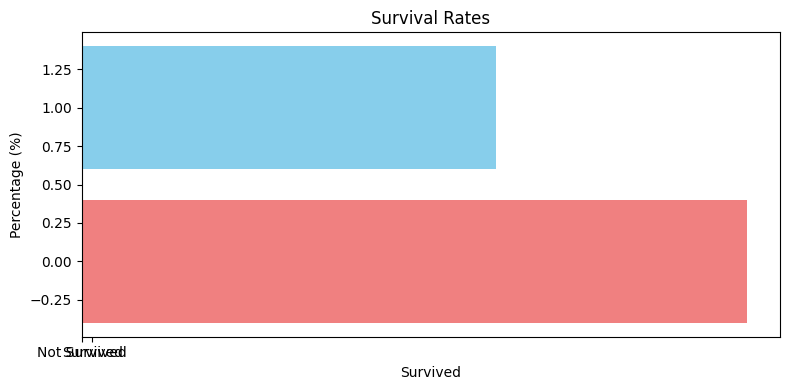

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.barh(survival_counts.index, survival_counts.values, color=['lightcoral', 'skyblue'])
plt.title('Survival Rates')
plt.xlabel('Survived')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

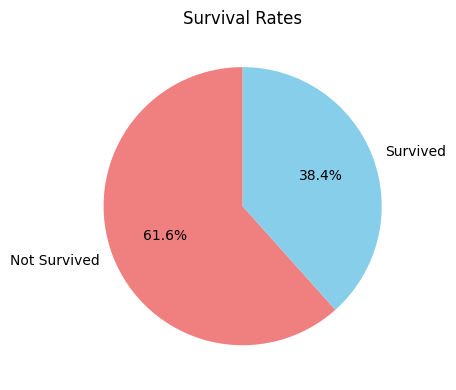

In [14]:
# Pie chart
plt.figure(figsize=(8, 4))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Survival Rates')
plt.tight_layout()
plt.show()


2.	Tính tỉ lệ sống sót của hành khách theo giới tính (Sex).Vẽ đồ thị: Sử dụng biểu đồ cột nhóm (grouped bar chart) để so sánh tỉ lệ sống sót giữa nam và nữ.

Survival Rates by Gender (%):
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


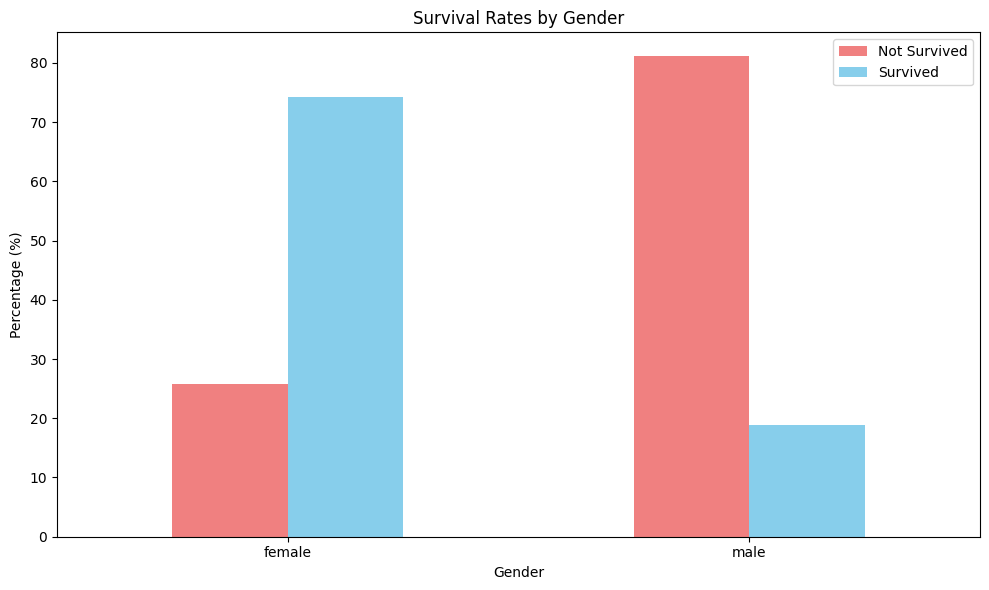

In [15]:
survival_by_sex = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
print("Survival Rates by Gender (%):")
print(survival_by_sex)

# Grouped bar chart
survival_by_sex.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightcoral', 'skyblue'])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

3.	Tính tỉ lệ sống sót theo hạng vé (Pclass). Vẽ đồ thị: Sử dụng biểu đồ cột để hiển thị tỉ lệ sống sót của hành khách theo từng hạng vé (1, 2, 3).

Survival Rates by Class (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


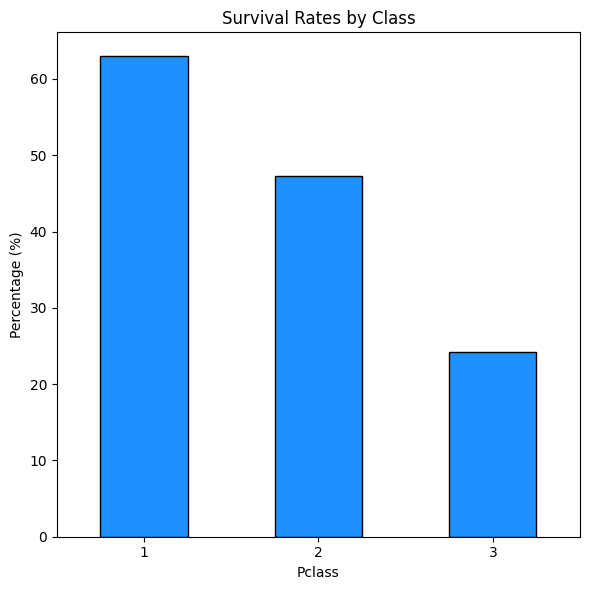

In [16]:
survival_by_pclass = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival Rates by Class (%):")
print(survival_by_pclass)

# Bar chart
survival_by_pclass.plot(kind='bar', figsize=(6, 6), color='dodgerblue', edgecolor='black')
plt.title('Survival Rates by Class')
plt.xlabel('Pclass')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

4.	Tính độ tuổi trung bình, nhỏ nhất và lớn nhất của các hành khách. Vẽ đồ thị: Vẽ biểu đồ histogram để hiển thị phân bố độ tuổi của hành khách.

Age Statistics: Mean=29.69911764705882, Min=0.42, Max=80.0


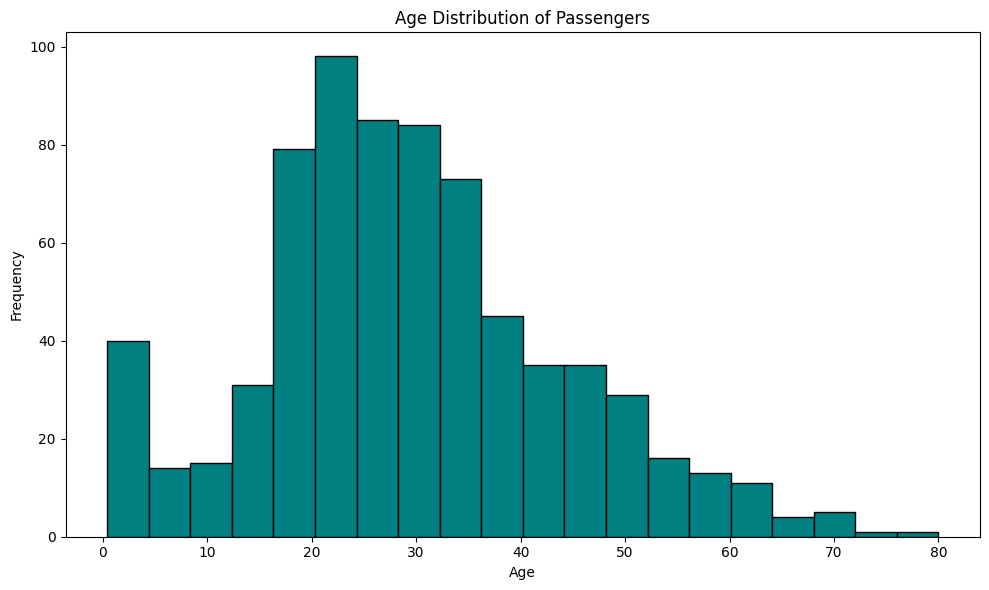

In [17]:
age_mean = df['Age'].mean()
age_min = df['Age'].min()
age_max = df['Age'].max()
print(f"Age Statistics: Mean={age_mean}, Min={age_min}, Max={age_max}")

# Histogram for age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=20, color='teal', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

5.	Phân chia hành khách thành các nhóm tuổi (trẻ em: 0-12, thanh thiếu niên: 13-19, người lớn: 20-60, người già: 60+). Tính tỉ lệ sống sót của mỗi nhóm tuổi.

In [18]:
def age_group(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 19:
        return 'Teenager'
    elif 20 <= age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)
survival_by_age_group = df.groupby('Age_Group')['Survived'].mean() * 100
print("Survival Rates by Age Group (%):")
print(survival_by_age_group)

Survival Rates by Age Group (%):
Age_Group
Adult       39.015152
Child       57.971014
Senior      28.643216
Teenager    41.052632
Name: Survived, dtype: float64


6.	Vẽ đồ thị: Sử dụng biểu đồ cột để hiển thị tỉ lệ sống sót của từng nhóm tuổi.

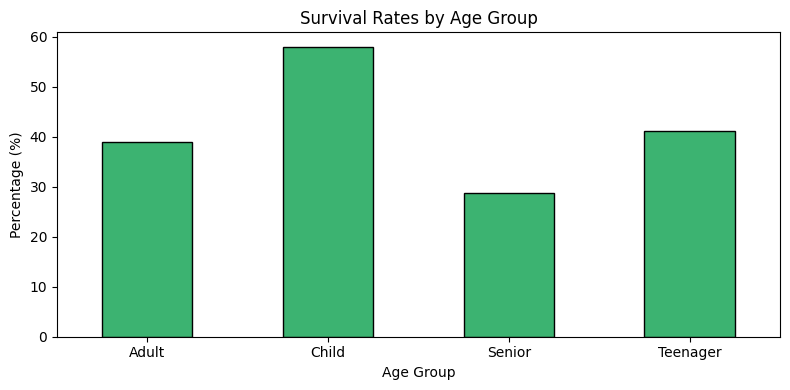

In [19]:
survival_by_age_group.plot(kind='bar', figsize=(8, 4), color='mediumseagreen', edgecolor='black')
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


7.	Tạo cột mới để tính tổng số người thân đi cùng cho mỗi hành khách (SibSp + Parch).

In [20]:
df['Family_Size'] = df['SibSp'] + df['Parch']

8.	Tính tỉ lệ sống sót của hành khách đi một mình và đi cùng gia đình.

In [21]:
df['Alone'] = df['Family_Size'] == 0
survival_by_alone = df.groupby('Alone')['Survived'].mean() * 100
print("Survival Rates for Passengers Traveling Alone vs With Family (%):")
print(survival_by_alone)

Survival Rates for Passengers Traveling Alone vs With Family (%):
Alone
False    50.564972
True     30.353818
Name: Survived, dtype: float64


9.	Vẽ đồ thị: Vẽ biểu đồ cột để so sánh tỉ lệ sống sót giữa hành khách đi một mình và đi cùng gia đình.

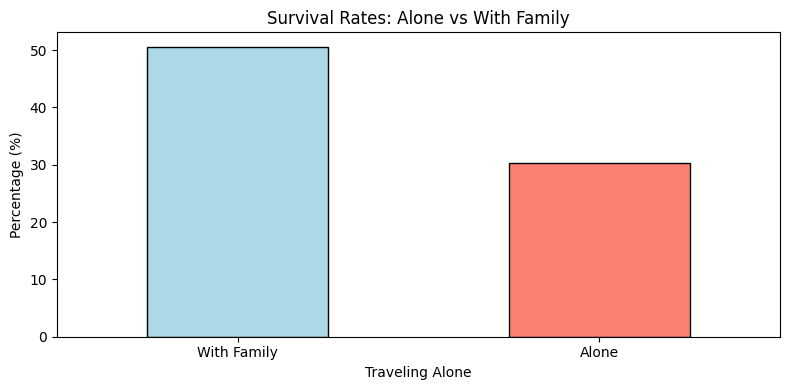

In [22]:
survival_by_alone.plot(kind='bar', figsize=(8, 4), color=['lightblue', 'salmon'], edgecolor='black')
plt.title('Survival Rates: Alone vs With Family')
plt.xlabel('Traveling Alone')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['With Family', 'Alone'], rotation=0)
plt.tight_layout()
plt.show()